In [1]:
import pandas as pd
#This package is used to import and to handle datasets

In [2]:
import numpy as np
#This package is used to handle individual columns of dataset and perform operation on them

In [3]:
import matplotlib.pyplot as plt
#This module is used to visulaize data through graphs so that one can apply the best algorithm possible

In [4]:
import sklearn
#This package contains the operations done on the whole dataset 
#For example splitting the dataset into training and testing

In [5]:
from sklearn import linear_model
#This module contains the Linear Regression algorithm that is to be implemented

In [6]:
import pickle
#This module helps in saving the trained model so that one need not train the model again and again 

In [7]:
from matplotlib import style
#This helps in handling the graphs in more colourful  and easy to understand

In [13]:
dataset=pd.read_csv('student-mat.csv',sep=";")
#The imported file is a .csv file in  which the data are seperated by comma(,) or semi-colon(;)
#Reading the file and importing the data into program
#All the data in the file will be taken by variable dataset

In [14]:
print(dataset.head())
#This helps in whether the data is imported sucessfully or not  
#It also helps in understaning the features and label by showing the first few rows
#you can also use print(dataset.tail()) which shows last few rows 

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [15]:
dataset=dataset[["G1","G2","G3","studytime","failures","absences"]]
#Here we are cuttting down the features into five  as a beginner
#Before training the model you should consider only the important features so to increase accuracy of model
#and decrease the time computation for higher models

In [16]:
predict = "G3"
#Here we are going to predict the Grade 3 of student based on other features

In [18]:
x = np.array(dataset.drop([predict],1))
#x=dataset[["G1","G2","studytime","failures","absences"]]
#Dropping a column which is going to be our label(ouput or result)

y=np.array(dataset[predict])
#y=dataset[["G3"]] Both are same
#storing the both features and lables as numpy arrays for easy splitting

In [19]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(x,y,test_size=0.3)
#Here the dataset is splitted into training and testing datset 
#the parameter test_size denotes the ratio of division 
#Here the training and testing share 70% and 30% of total dataset 

In [20]:
classifier =linear_model.LinearRegression();
#Declaring the classifer 
#There  are hyperparameters  which can be tweaked to increase your accuracy
#By Default it takes the Below given values

In [21]:
classifier.fit(x_train,y_train)
#Training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
accuracy =classifier.score(x_test,y_test)
#Finding the accuracy of model by testing on test dateset

In [24]:
print(accuracy)
#printing th accuracy of model

0.7911511327472398


In [25]:
with open("studentmodel.pickle","wb") as f:
	pickle.dump(classifier,f)
#This is way of storing trained model which can later be tested without training again
#The trained model will be stored in  studentmodel.pickle  file

In [26]:
pickle_in = open("studentmodel.pickle","rb")
linearclassifier =pickle.load(pickle_in)
#you can load the trained model in this manner

In [28]:
print("coefficient : ",linearclassifier.coef_)
print('Intercept :\n',linearclassifier.intercept_)  
#As Linear Regression algorithm follows the line y=mx +b
#Where m=slope of line and b= y-intercept of line

coefficient :  [ 0.15154885  0.96686511 -0.21173071 -0.24133028  0.03070042]
Intercept :
 -1.2200382940825953


In [32]:
predictions =linearclassifier.predict(x_test)
print(predictions)
#predicting the values of test dataset

[11.99432392 11.14830723 12.83716837  7.7052372  12.77576753  8.48260242
  8.82059704 15.34883149 11.87803858  7.9139138  14.92097887 11.90148838
  6.85295262 11.27220976  8.15031329  5.30985827 14.01429562 13.10761238
 14.98116073  3.01387278 15.94924481  6.73527643  8.60642838 10.6303066
 12.08483849  8.63293229  3.82918904 12.35352508 13.86518473 18.03452387
 13.77381775 10.96215146 11.385441   10.1414494  11.08495314 15.43971378
 18.24869254 12.74433283  5.88473822 13.47528314 14.8922317  12.4150978
 16.40267237  7.76236496  8.69657639  8.42344484 18.9452855  10.14952273
 12.74433283 15.70893881  5.94406768  9.17736026  8.00284283  7.30381191
  9.30936582  7.54941527 10.99602411  9.42174464  8.06078144 11.74798627
  9.23754212  7.81985928 10.65905377 15.13270957 14.53852259  9.51189265
 11.83764958 12.38410738  5.58376566 14.98116073 10.96483899 14.28864615
 12.87018861 15.04256157  9.939011   11.83923513  8.18089558  8.57377471
 12.95728251 15.19411042 12.68415096 17.55252102  6.8

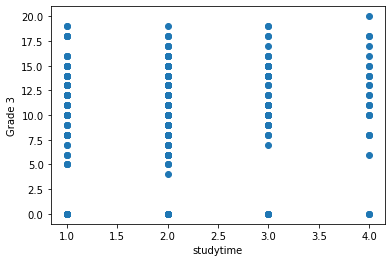

In [36]:
plt.scatter(dataset["studytime"],dataset["G3"])
plt.xlabel("studytime")
plt.ylabel("Grade 3")
#plt.plot()
plt.show()
#plotting the data in a graph
#This is not the correct way to plot the graph

In [ ]:
#In all the taken features Which has more influence on result?